In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
#Loading dataset
wine = pd.read_csv('wine/winequality-red.csv')

In [3]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


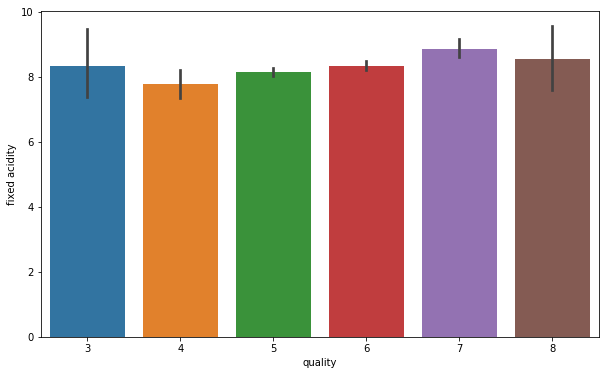

In [5]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

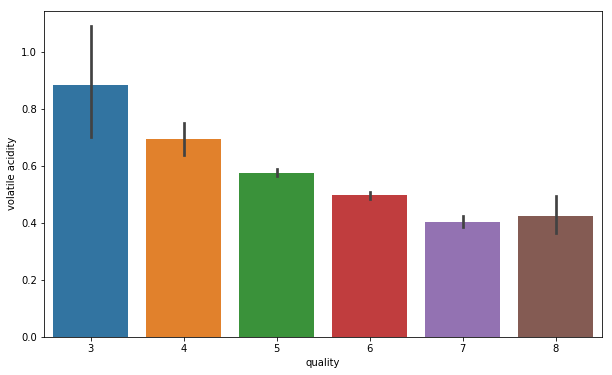

In [6]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

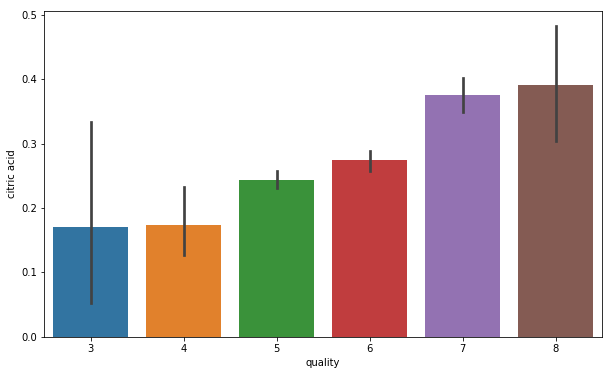

In [7]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

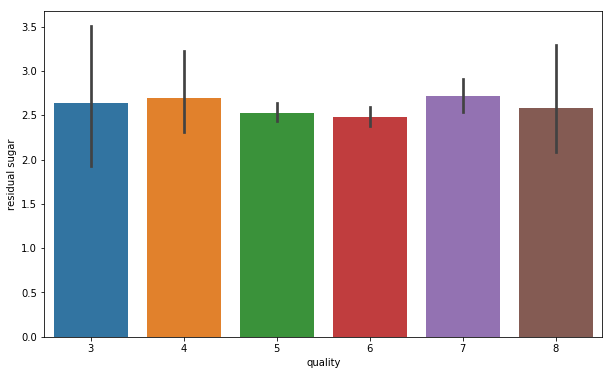

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

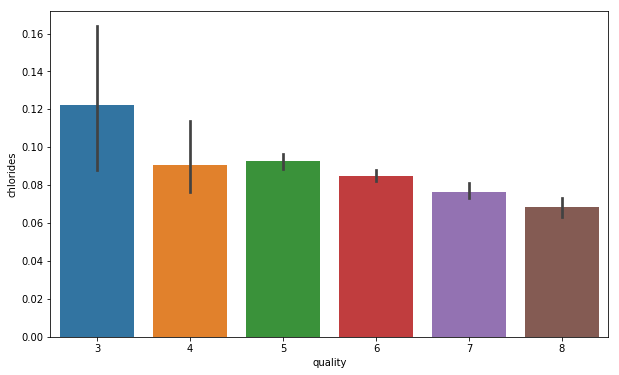

In [9]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

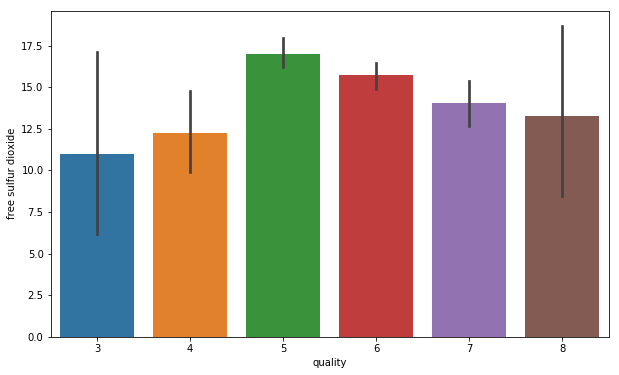

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

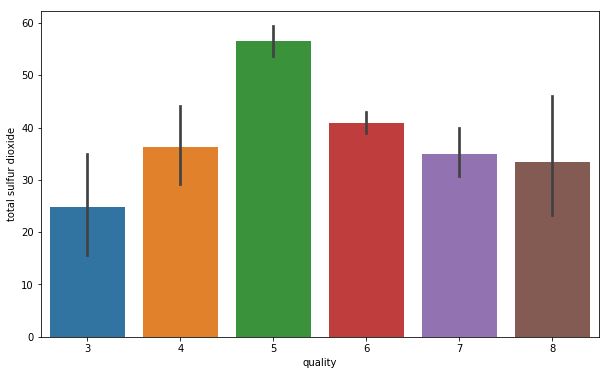

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

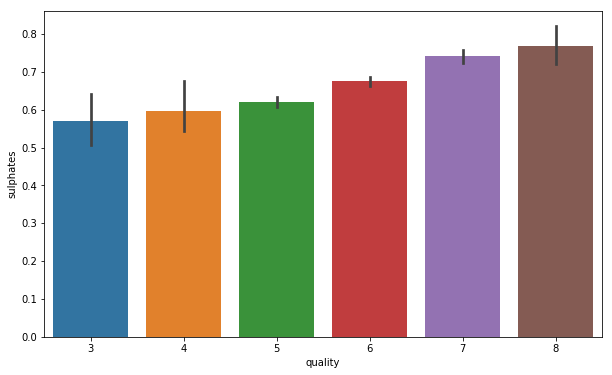

In [12]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

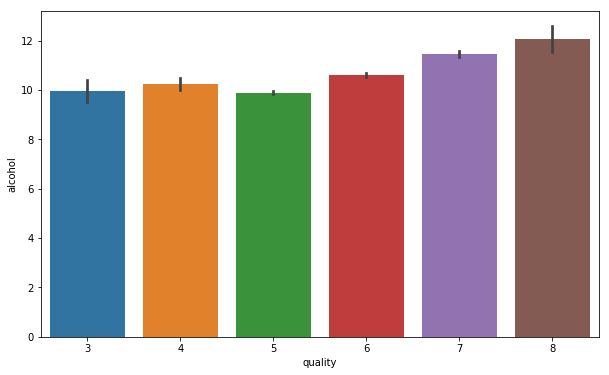

In [13]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [14]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [15]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

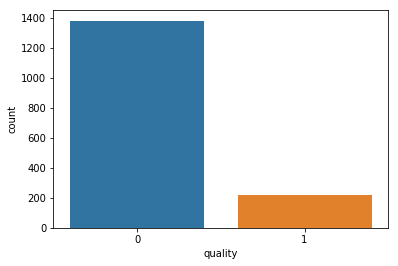

In [16]:
sns.countplot(wine['quality'])

In [17]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.90      0.96      0.93       273
          1       0.66      0.40      0.50        47

avg / total       0.87      0.88      0.87       320

[[263  10]
 [ 28  19]]


In [21]:
# Stochastic Gradient Decent Classifier
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

print(classification_report(y_test, pred_sgd))

print(confusion_matrix(y_test, pred_sgd))

             precision    recall  f1-score   support

          0       0.90      0.92      0.91       273
          1       0.46      0.40      0.43        47

avg / total       0.84      0.84      0.84       320

[[251  22]
 [ 28  19]]


/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [23]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print(classification_report(y_test, pred_svc))

print(confusion_matrix(y_test, pred_svc))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       273
          1       0.71      0.26      0.37        47

avg / total       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


In [24]:
# Let's try to increase our accuracy of models

# Grid Search CV

#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_svc.fit(X_train, y_train)

In [ ]:
#Best parameters for our svc model
grid_svc.best_params_

In [26]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94       273
          1       0.89      0.34      0.49        47

avg / total       0.90      0.90      0.88       320



In [27]:
# Cross Validation Score for random forest and SGD

#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9108821358267717

In [29]:
# Gerekli Kütüphaneleri Yüklenmesi Yapılıyor
import numpy as np # linear algebra
import pandas as pd # veri işleme

#Görselleştirme Kütüphaneleri
import seaborn as sns
import matplotlib.pyplot as plt

#Makine öğrenmesi gereçleri
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Makine öğrenmesi algoritmaları
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Performans metrikleri
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

#Sistem kütüphaneleri
import os
import warnings

# Çıktılarda karmaşıklığa sebep olduğu için uyarılırı iptal ediyoruz
warnings.filterwarnings("ignore")
#print(os.listdir("../input"))

In [30]:
#Veri setinin yüklemesi yapılıyor 
dataset=pd.read_csv("wine/winequality-red.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [32]:
#Kaç farklı kalite puanı olduğunu öğrenelim
print("Kalite puanları:",dataset['quality'].unique())

Kalite puanları: [5 6 7 4 8 3]


In [33]:
#Herbir kalite puanından kaçtane örnek olduğunu görelim
print(dataset['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


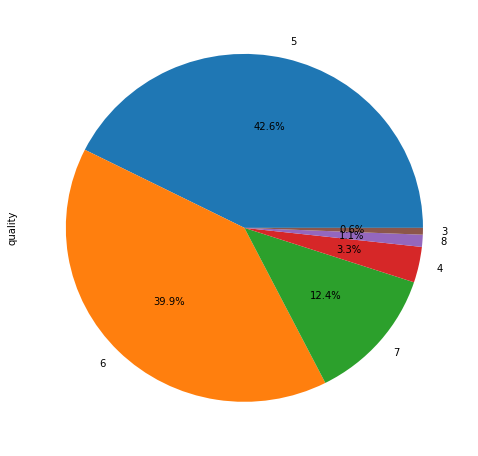

In [34]:
#kalite puanlarını pie grafikle göstrelim
plt.figure(1, figsize=(8,8))
dataset['quality'].value_counts().plot.pie(autopct="%1.1f%%")

In [35]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [36]:
selected_features=['residual sugar', 'total sulfur dioxide', 'sulphates',
                   'alcohol', 'volatile acidity', 'quality']
dataset_selected_features=dataset[selected_features]

In [37]:
condition1=(dataset_selected_features['quality']==3)|(dataset_selected_features['quality']==4)
condition2=(dataset_selected_features['quality']==5)|(dataset_selected_features['quality']==6)
condition3=(dataset_selected_features['quality']==7)|(dataset_selected_features['quality']==8)
level_34=round(dataset_selected_features[condition1].describe(),2)
level_56=round(dataset_selected_features[condition2].describe(),2)
level_78=round(dataset_selected_features[condition3].describe(),2)

In [38]:
level_all=pd.concat([level_34,level_56, level_78],
                    axis=1, 
                    keys=['Levels:3,4','Levels:5,6','Levels:7,8',])
level_all.T

count   mean    std   min    25%    50%  \
Levels:3,4 residual sugar          63.0   2.68   1.72  1.20   1.90   2.10   
           total sulfur dioxide    63.0  34.44  26.40  7.00  13.50  26.00   
           sulphates               63.0   0.59   0.22  0.33   0.50   0.56   
           alcohol                 63.0  10.22   0.92  8.40   9.60  10.00   
           volatile acidity        63.0   0.72   0.25  0.23   0.56   0.68   
           quality                 63.0   3.84   0.37  3.00   4.00   4.00   
Levels:5,6 residual sugar        1319.0   2.50   1.40  0.90   1.90   2.20   
           total sulfur dioxide  1319.0  48.95  32.71  6.00  24.00  40.00   
           sulphates             1319.0   0.65   0.17  0.37   0.54   0.61   
           alcohol               1319.0  10.25   0.97  8.40   9.50  10.00   
           volatile acidity      1319.0   0.54   0.17  0.16   0.41   0.54   
           quality               1319.0   5.48   0.50  5.00   5.00   5.00   
Levels:7,8 residual sugar         217.0   2.71   1.36  1.20   2.00   2.30   
           total sulfur dioxide   217.0  34.89  32.57  7.00  17.00  27.00   
           sulphates              217.0   0.74   0.13  0.39   0.65   0.74   
           alcohol                217.0  11.52   1.00  9.20  10.80  11.60   
           volatile acidity       217.0   0.41   0.14  0.12   0.30   0.37   
           quality                217.0   7.08   0.28  7.00   7.00   7.00   

                                   75%     max  
Levels:3,4 residual sugar         2.95   12.90  
           total sulfur dioxide  48.00  119.00  
           sulphates              0.60    2.00  
           alcohol               11.00   13.10  
           volatile acidity       0.88    1.58  
           quality                4.00    4.00  
Levels:5,6 residual sugar         2.60   15.50  
           total sulfur dioxide  65.00  165.00  
           sulphates              0.70    1.98  
           alcohol               10.90   14.90  
           volatile acidity       0.64    1.33  
           quality                6.00    6.00  
Levels:7,8 residual sugar         2.70    8.90  
           total sulfur dioxide  43.00  289.00  
           sulphates              0.82    1.36  
           alcohol               12.20   14.00  
           volatile acidity       0.49    0.92  
           quality                7.00    8.00

In [39]:
#Özelliklerin kalite puanları ile ilişkisini göstermek için kullanılacak
#çizim türleri
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    """
    dataset: Veri seti
    rows: Satır sayısı
    cols: sütün sayısı
    plot_type: Çizdirilecek grafik türü
    """
    
    #Veri setindeki sütünların isimleri alınıyor
    column_names=dataset.columns.values
    #Kaç tane sütün olduğu bulunuyor
    number_of_column=len(column_names)
    
    #Satır*sütün boyutlarında alt grafik içeren
    #matris oluşturuluyor. Matrisin genişliği:22 yüksekliği:16
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))

    counter=0# Çizimi yapılacak özelliğin column_names listesindeki indeks değerini tutuyor
    for i in range(rows):
        for j in range(cols):
            """
            i: satır numarasını tutuyor
            j: sütün numarasını tutuyor
            axarr[i][j]: Çizilen grafigin grafik matrisindeki yerini belirliyor
            """
            if 'violin' in plot_type:
                sns.violinplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot(x='quality', y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(x='quality',y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

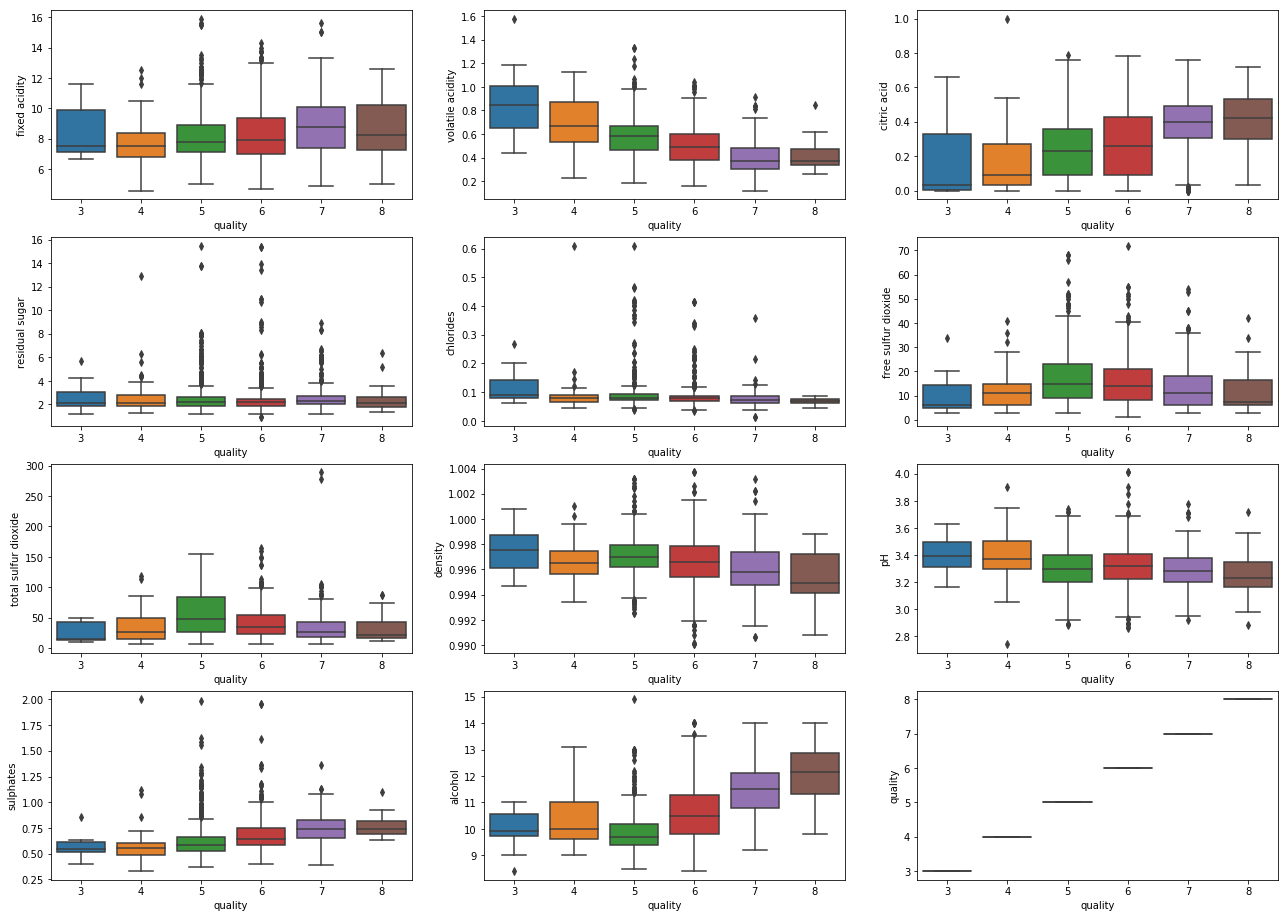

In [40]:
#Box Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset,4,3,"box")

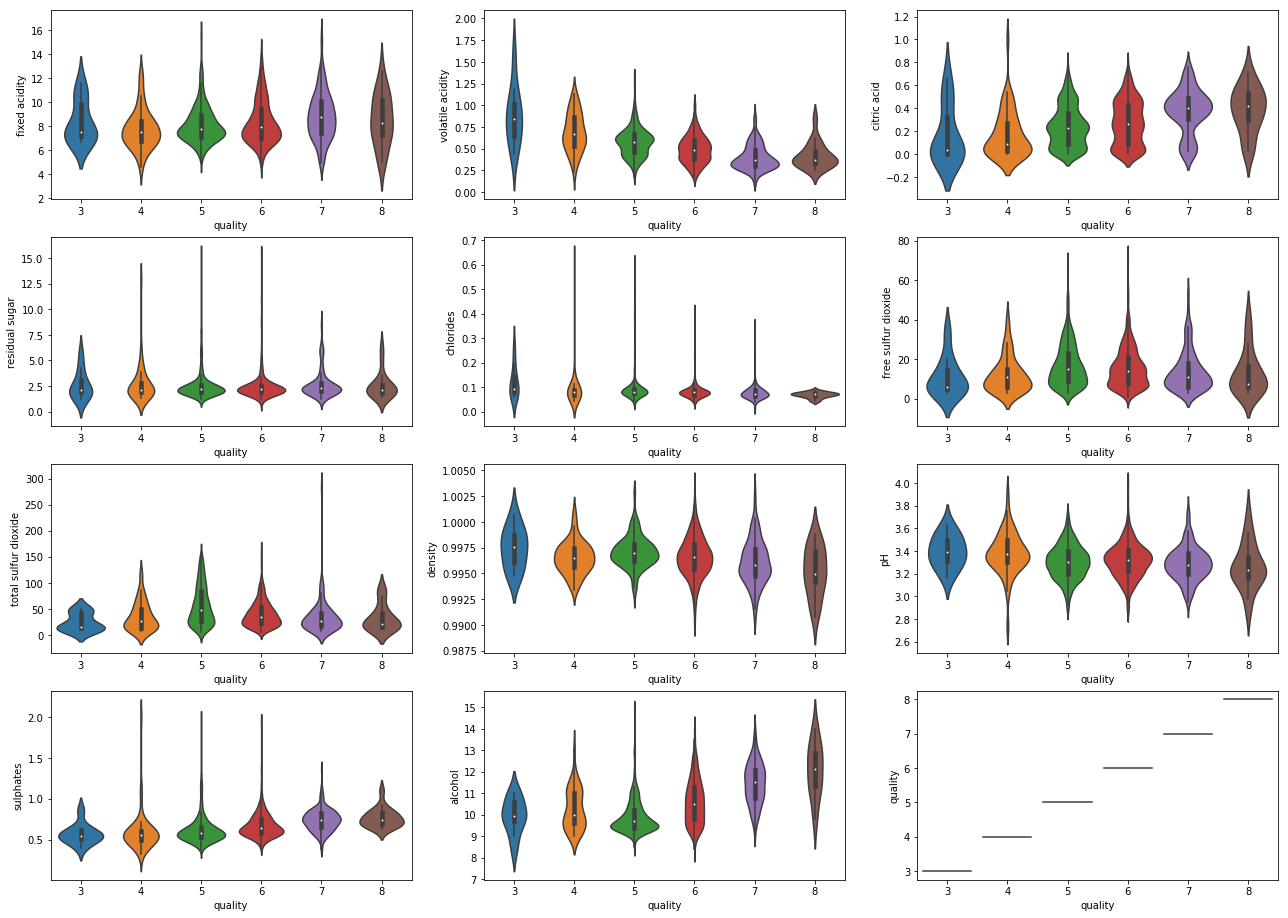

In [41]:
#Violin Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset,4,3,"violin")

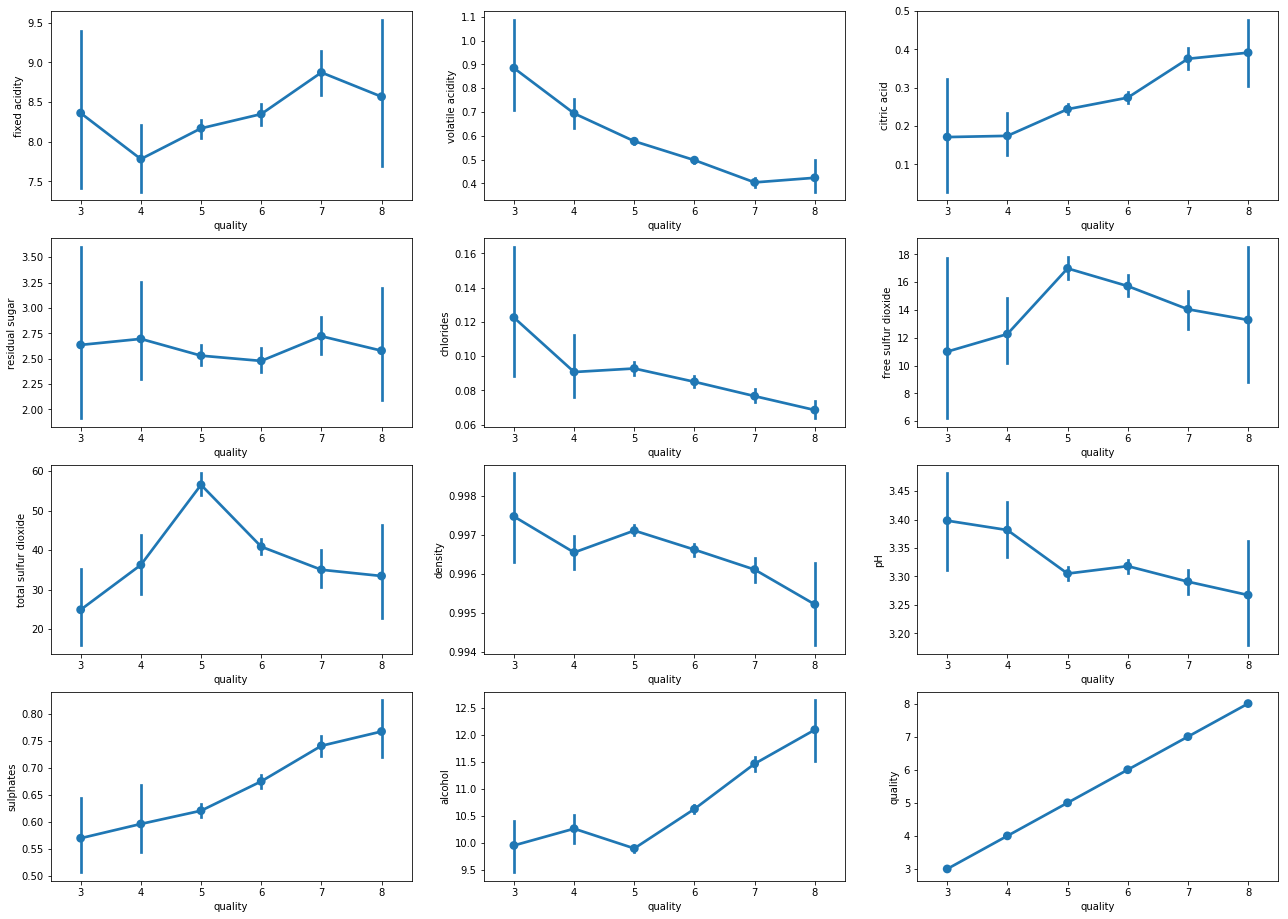

In [42]:
#Point Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset,4,3,"pointplot")

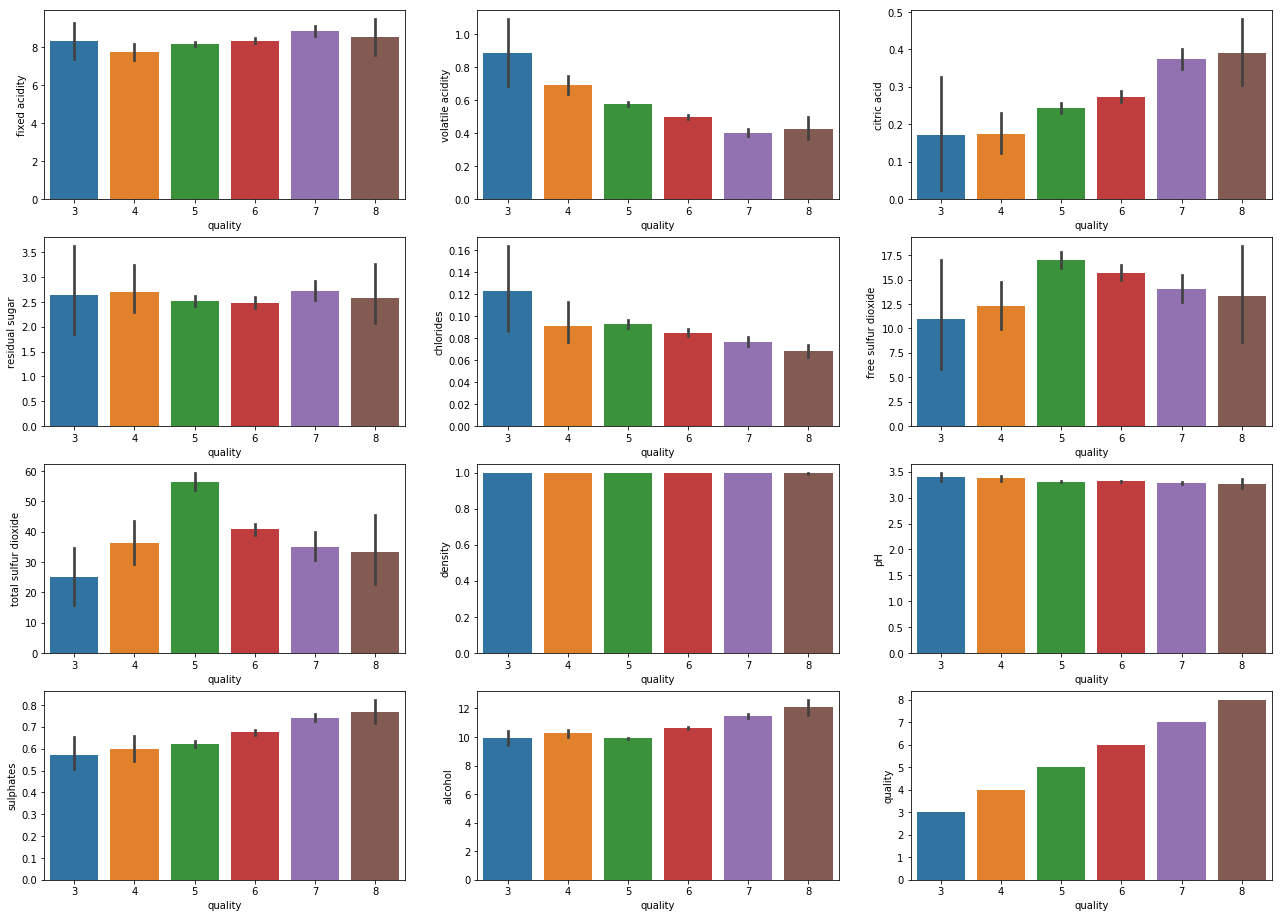

In [43]:
#Bar Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset,4,3,"bar")

In [44]:
def get_models():
    models=[]
    models.append(("LR",LogisticRegression()))
    models.append(("NB",GaussianNB()))
    models.append(("KNN",KNeighborsClassifier()))
    models.append(("DT",DecisionTreeClassifier()))
    models.append(("SVM rbf",SVC()))
    models.append(("SVM linear",SVC(kernel='linear')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    
    return models

def cross_validation_scores_for_various_ml_models(X_cv, y_cv):
    print("Çapraz Doğrulama Başarı Oranları".upper())
    models=get_models()


    results=[]
    names= []

    for name, model in models:
        kfold=KFold(n_splits=5,shuffle=True,random_state=22)
        cv_result=cross_val_score(model,X_cv, y_cv, cv=kfold,scoring="accuracy")
        names.append(name)
        results.append(cv_result)
        print("{} modelinin çapraz doğrulaması yapıldı, başarı oranı:{:0.2f}".format(name, cv_result.mean()))

In [45]:
dataset_temp=dataset.copy(deep=True)
X=dataset.drop('quality', axis=1)
y=dataset['quality']

X=StandardScaler().fit_transform(X)
cross_validation_scores_for_various_ml_models(X, y)

ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
LR modelinin çapraz doğrulaması yapıldı, başarı oranı:0.59
NB modelinin çapraz doğrulaması yapıldı, başarı oranı:0.55
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.57
DT modelinin çapraz doğrulaması yapıldı, başarı oranı:0.57
SVM rbf modelinin çapraz doğrulaması yapıldı, başarı oranı:0.62
SVM linear modelinin çapraz doğrulaması yapıldı, başarı oranı:0.57
LDA modelinin çapraz doğrulaması yapıldı, başarı oranı:0.59


In [46]:
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

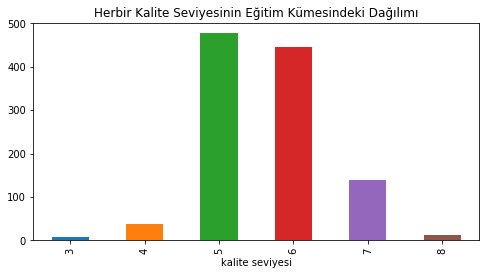

In [47]:
y_frame=pd.DataFrame()
y_frame['kalite seviyesi']=y_train
y_frame.groupby(['kalite seviyesi']).size().plot.bar(figsize=(8,4),
                                                     title="Herbir Kalite Seviyesinin Eğitim Kümesindeki Dağılımı")

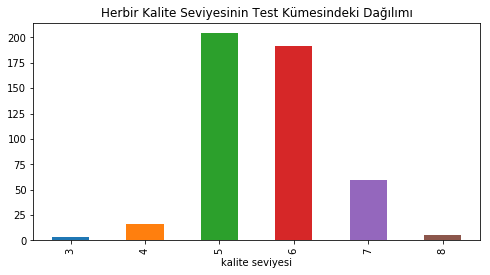

In [48]:
y_frame=pd.DataFrame()
y_frame['kalite seviyesi']=y_test
y_frame.groupby(['kalite seviyesi']).size().plot.bar(figsize=(8,4),title="Herbir Kalite Seviyesinin Test Kümesindeki Dağılımı")

In [49]:
def SVM_GridSearch(X_train, X_test, y_train, y_test):
    best_score=0
    gammas=[0.001, 0.01, 0.1, 1, 10, 100]
    Cs=[0.001, 0.01, 0.1, 1, 10, 100]
    
    for gamma in gammas:
        for C in Cs:
            svm=SVC(kernel='rbf',gamma=gamma, C=C)
            svm.fit(X_train, y_train)
            
            
            score=svm.score(X_test, y_test)
            
            if score>best_score:
                y_pred=svm.predict(X_test)
                best_score=score
                best_params={'C':C, 'gamma':gamma}
        
    print("best score:",best_score)
    print("best params:",best_params)
    print("classification reports:\n",classification_report(y_test, y_pred))

In [ ]:
SVM_GridSearch(X_train, X_test, y_train, y_test)

In [50]:
dataset_temp.loc[(dataset_temp['quality']==3),'quality']=1
dataset_temp.loc[(dataset_temp['quality']==4),'quality']=1

dataset_temp.loc[(dataset_temp['quality']==5),'quality']=2
dataset_temp.loc[(dataset_temp['quality']==6),'quality']=2

dataset_temp.loc[(dataset_temp['quality']==7),'quality']=3
dataset_temp.loc[(dataset_temp['quality']==8),'quality']=3

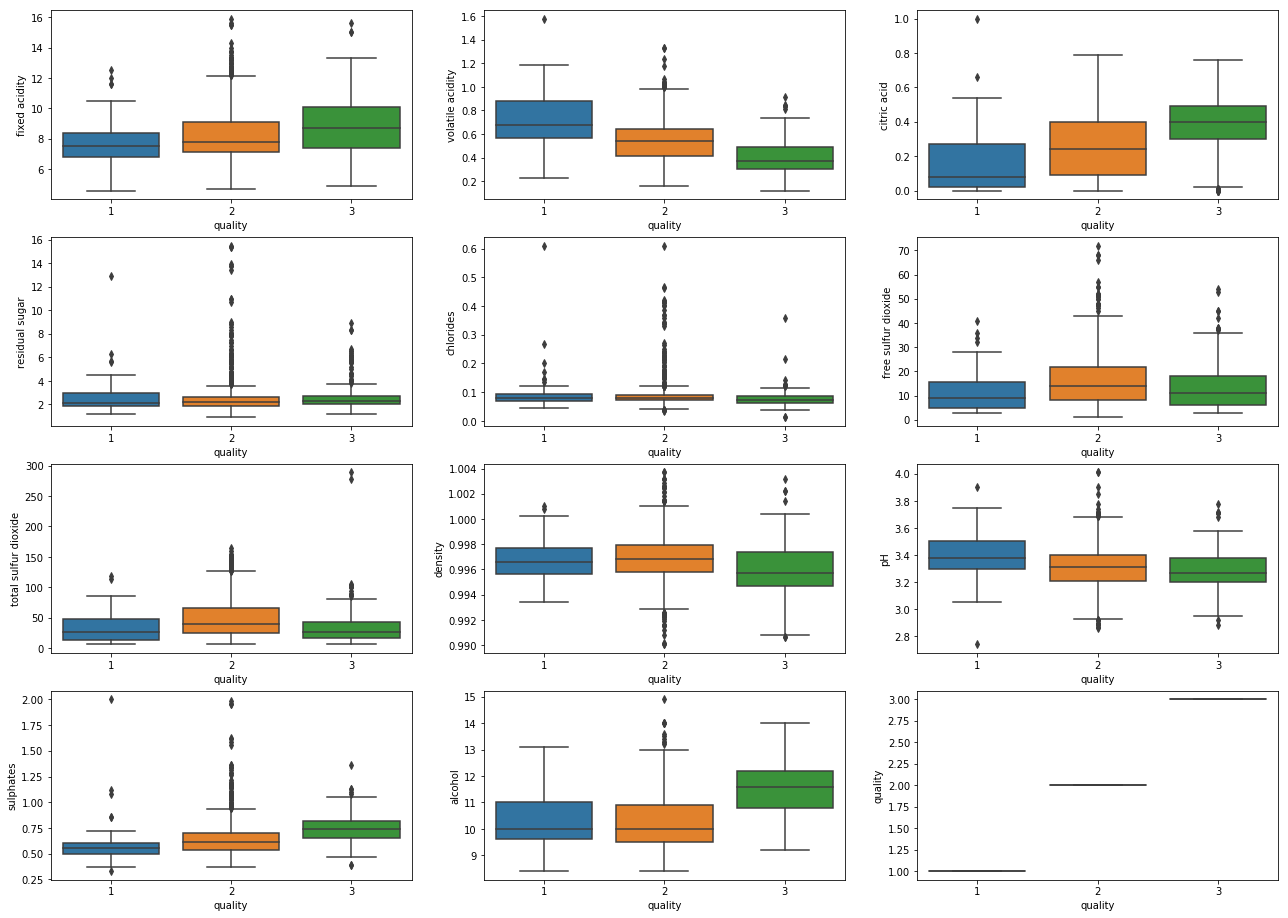

In [51]:
#Box Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset_temp,4,3,"box")

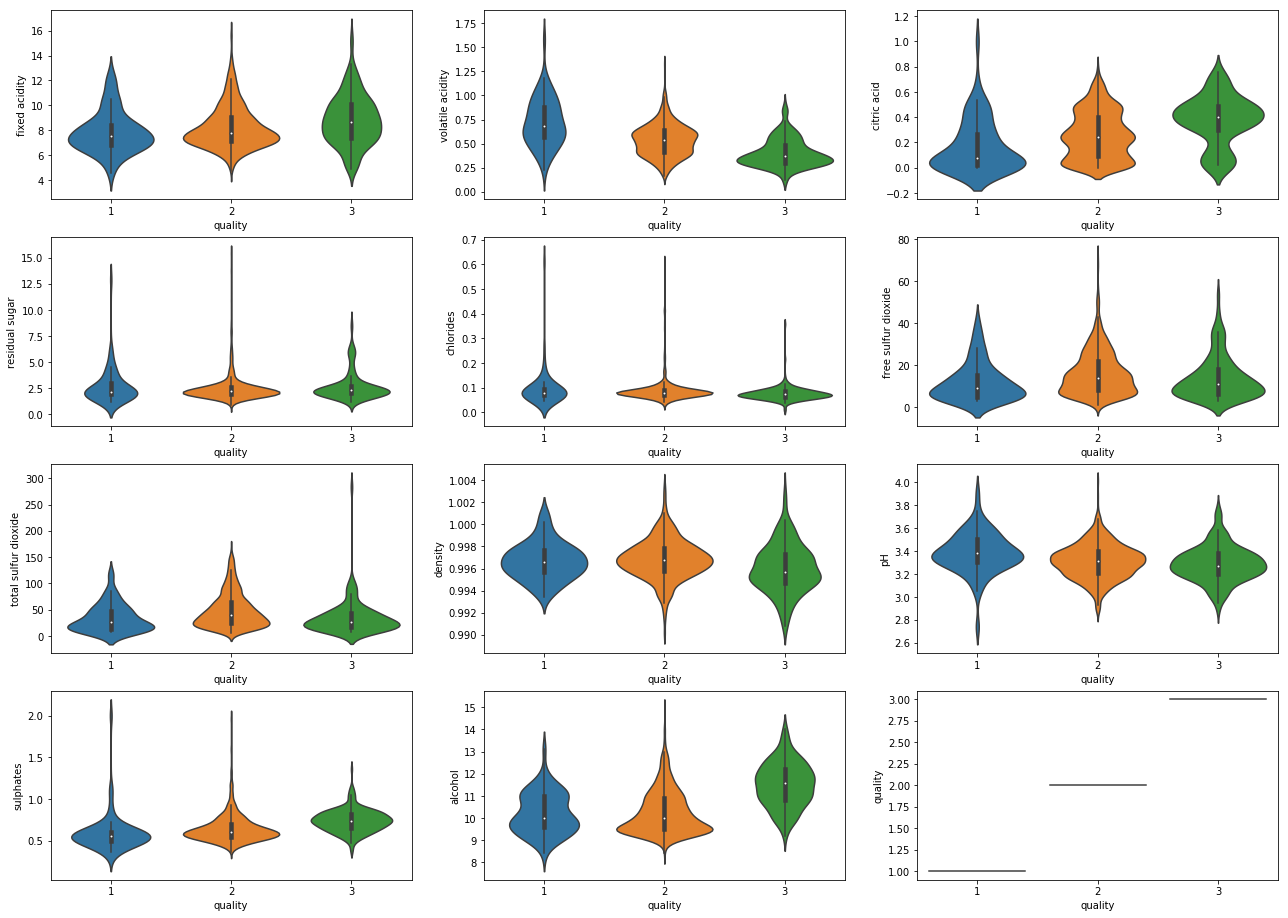

In [52]:
#Violin Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset_temp,4,3,"violin")

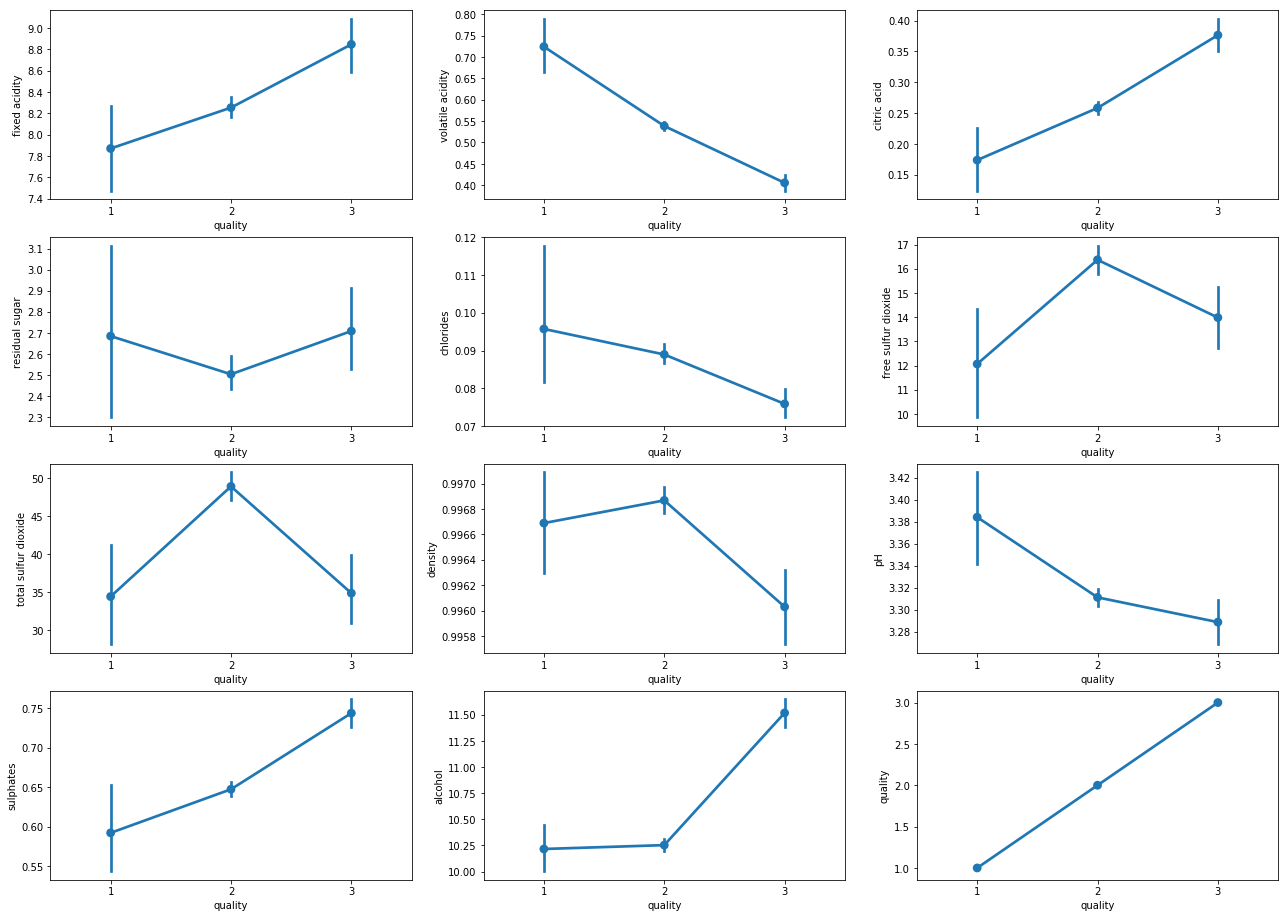

In [53]:
#Point Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset_temp,4,3,"point")

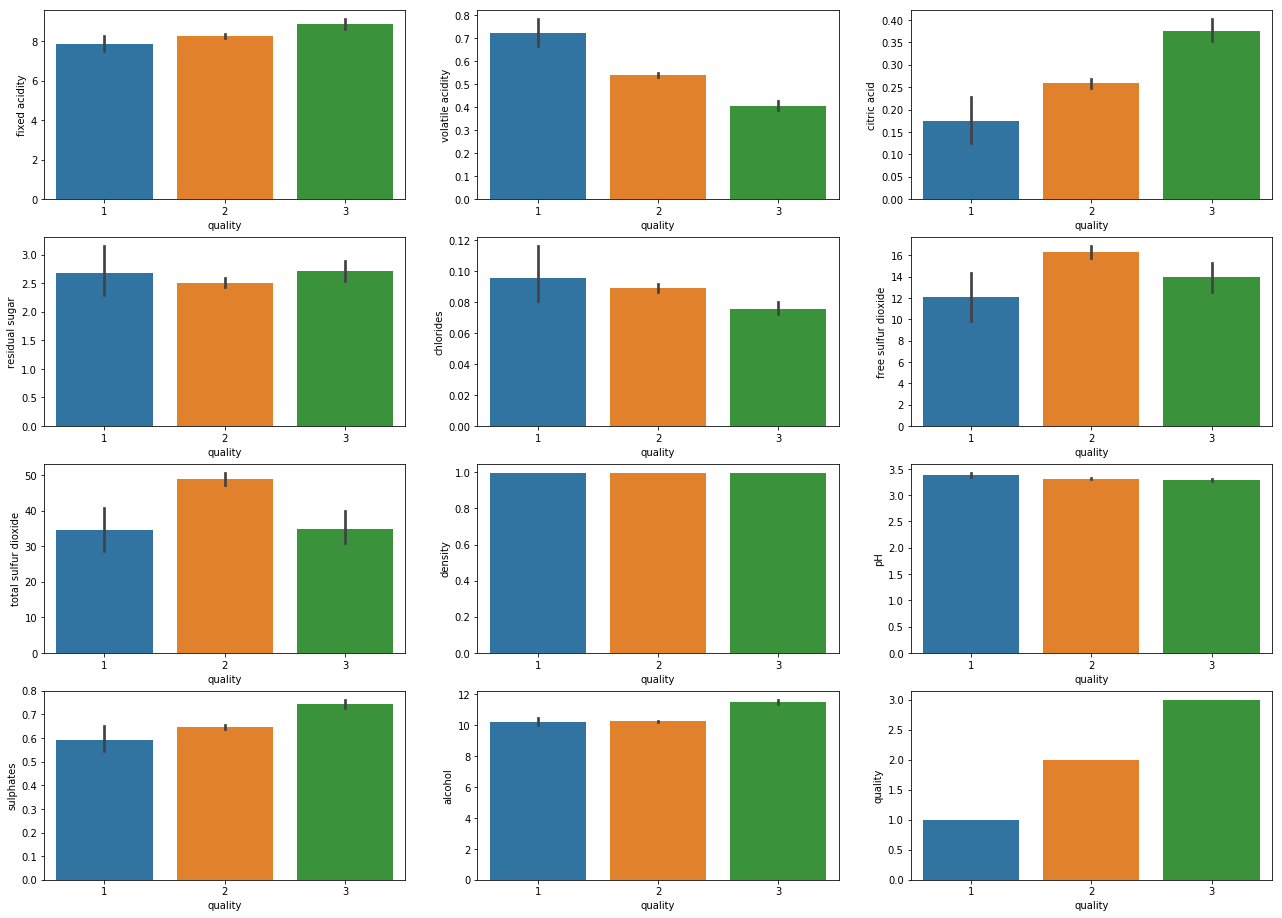

In [54]:
#Bar Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset_temp,4,3,"bar")

In [55]:
X_temp=dataset_temp.drop('quality', axis=1)
y_temp=dataset_temp['quality']
X_temp=StandardScaler().fit_transform(X_temp)

X_train_temp, X_test_temp, y_train_temp, y_test_temp=train_test_split(X_temp, 
                                                                      y_temp,
                                                                      stratify=y_temp,
                                                                      test_size=0.3,
                                                                      random_state=42)


cross_validation_scores_for_various_ml_models(X_temp, y_temp)

ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
LR modelinin çapraz doğrulaması yapıldı, başarı oranı:0.84
NB modelinin çapraz doğrulaması yapıldı, başarı oranı:0.78
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.83
DT modelinin çapraz doğrulaması yapıldı, başarı oranı:0.81
SVM rbf modelinin çapraz doğrulaması yapıldı, başarı oranı:0.85
SVM linear modelinin çapraz doğrulaması yapıldı, başarı oranı:0.82
LDA modelinin çapraz doğrulaması yapıldı, başarı oranı:0.83


In [56]:
SVM_GridSearch(X_train_temp, X_test_temp, y_train_temp, y_test_temp)

best score: 0.8625
best params: {'C': 1, 'gamma': 1}
classification reports:
              precision    recall  f1-score   support

          1       0.00      0.00      0.00        19
          2       0.87      0.98      0.92       396
          3       0.80      0.37      0.51        65

avg / total       0.82      0.86      0.83       480



In [59]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [60]:
df=pd.read_csv(r'wine/winequality-red.csv')

In [61]:
df.shape

(1599, 12)

In [62]:
df.columns # the quality is the target variable that we have to predict.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [64]:
df.isnull().sum() # no null or Nan values.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [65]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


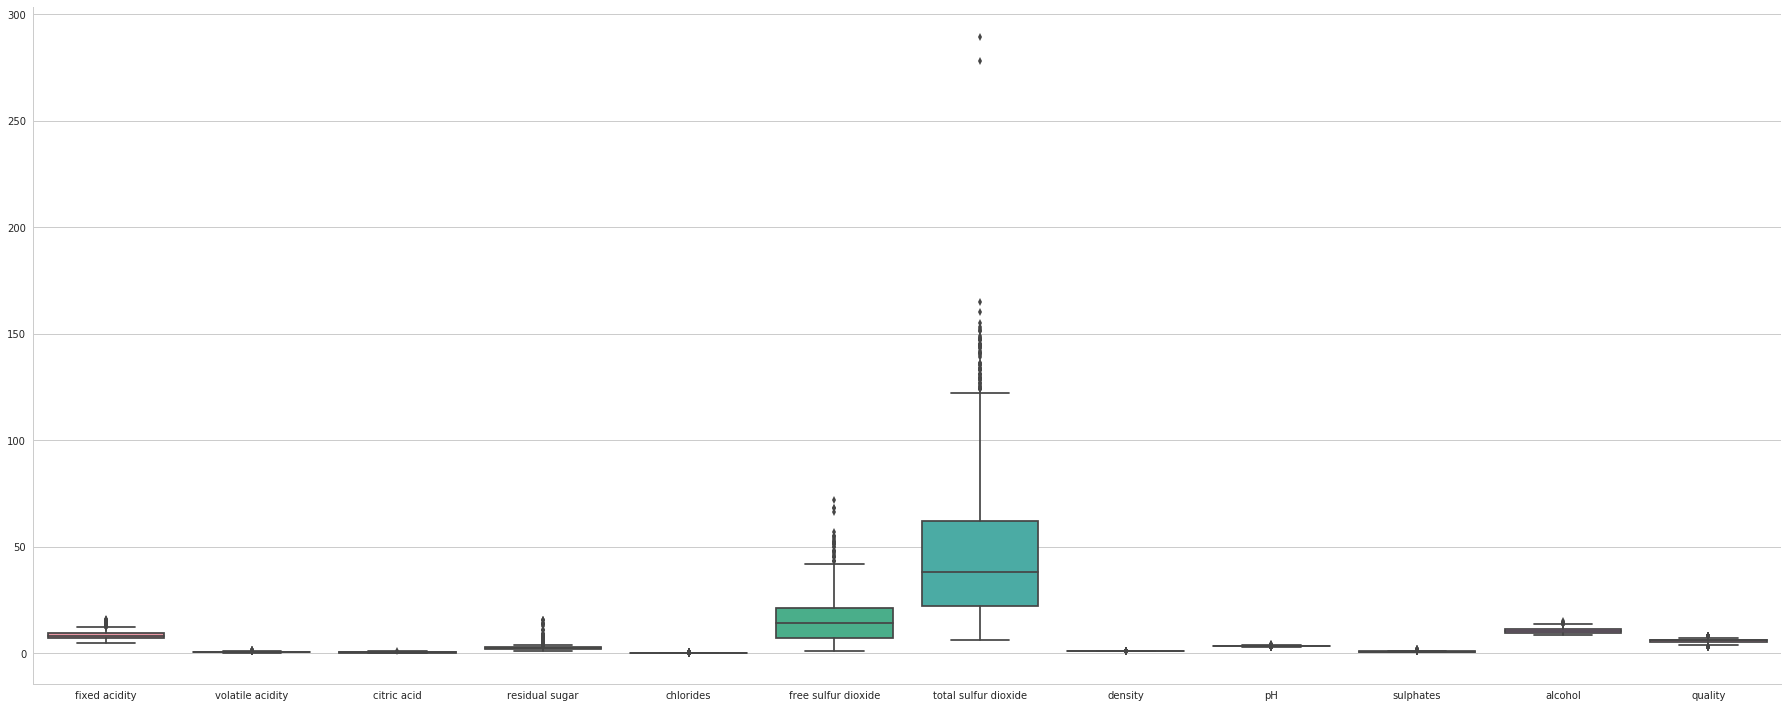

In [66]:
#fixed acidity.
sns.factorplot(data=df,kind='box',size=10,aspect=2.5) # the values are distributed over a very small scale.

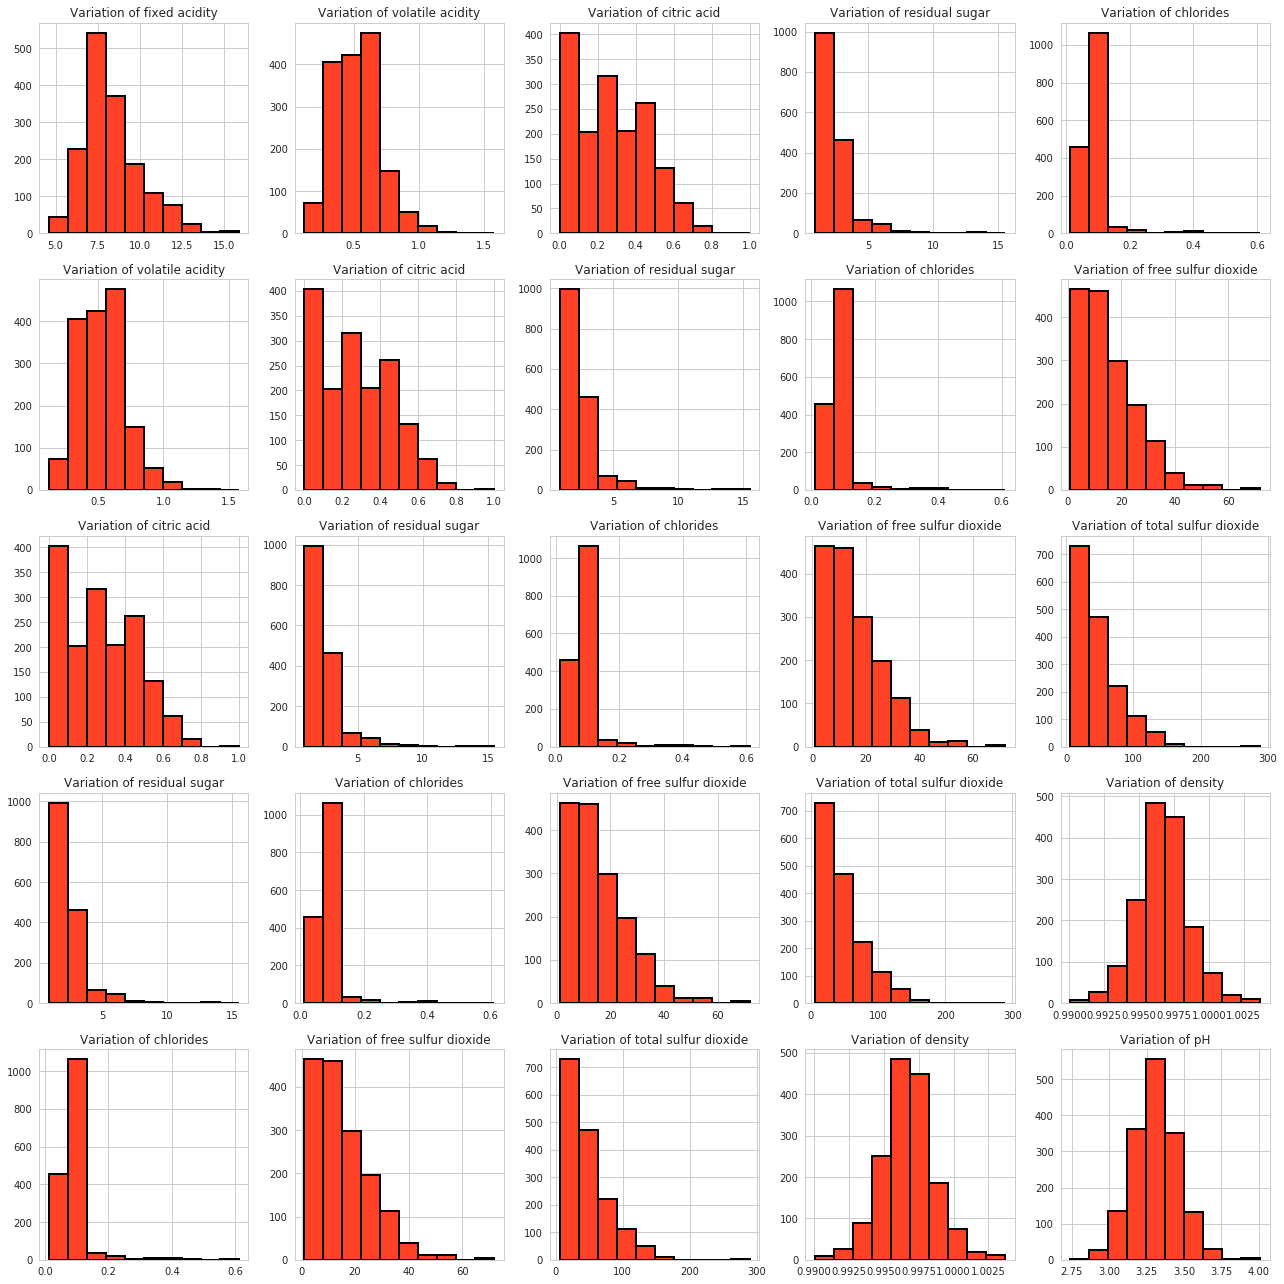

In [67]:
# using a histogram.
fig,axes=plt.subplots(5,5)
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for i in range (5):
    for j in range (5):
        axes[i,j].hist(x=columns[i+j],data=df,edgecolor='#000000',linewidth=2,color='#ff4125')
        axes[i,j].set_title('Variation of '+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(18,18)
fig.tight_layout()

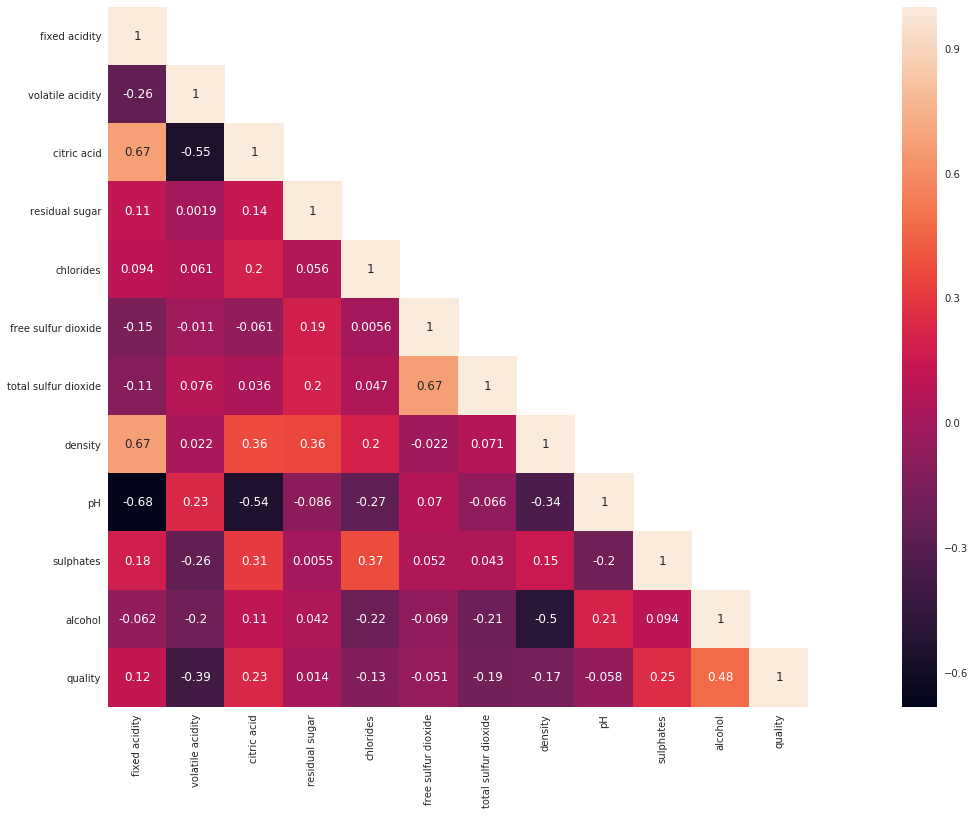

In [68]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [69]:
def plot(feature_x,target='quality'):
    sns.factorplot(x=target,y=feature_x,data=df,kind='bar',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='violin',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='swarm',size=5,aspect=1)

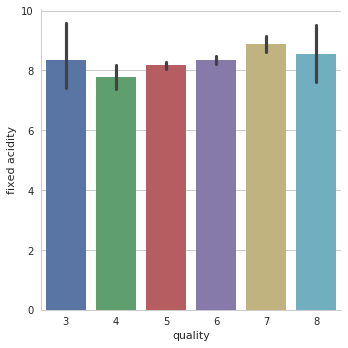

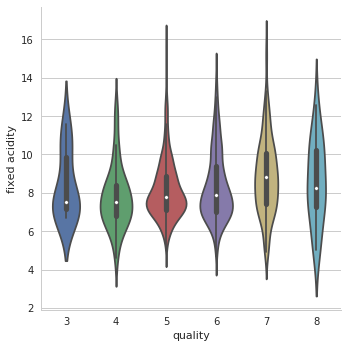

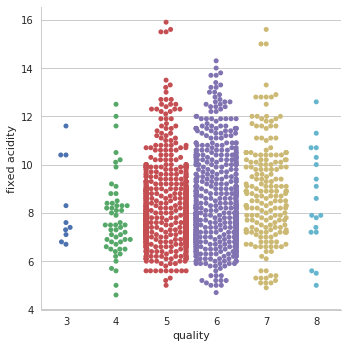

In [70]:
# for fixed acidity.
plot('fixed acidity','quality')

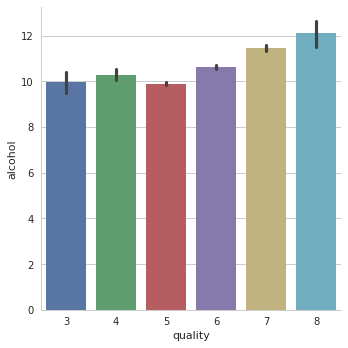

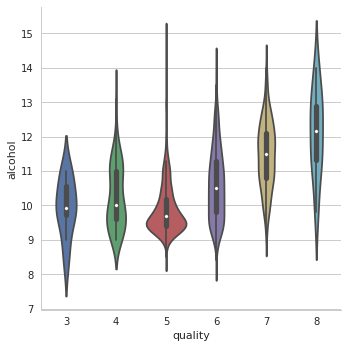

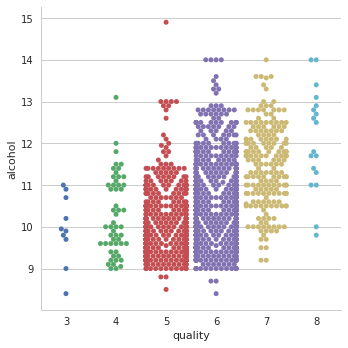

In [71]:
# for alcohol.
plot('alcohol','quality')

In [72]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [73]:
label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

x_train,x_test,y_train,y_test=train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.25,random_state=42)

In [74]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

{'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.8775, 0.875, 0.8725, 0.8625, 0.9075, 0.8875, 0.88, 0.8525]}

In [75]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.8775
1,LinearSVM,0.8750
2,rbfSVM,0.8725
3,KNearestNeighbors,0.8625
4,RandomForestClassifier,0.9075
5,DecisionTree,0.8875
6,GradientBoostingClassifier,0.8800
7,GaussianNB,0.8525


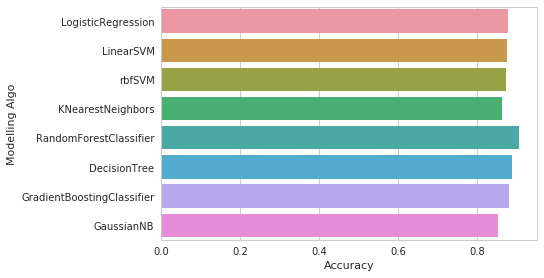

In [76]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

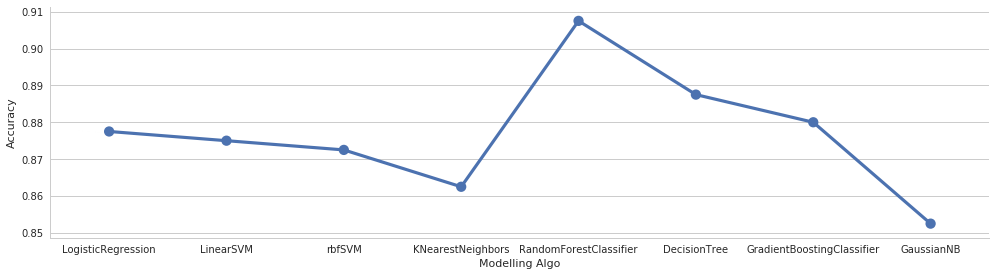

In [77]:
sns.factorplot(x='Modelling Algo',y='Accuracy',data=acc_frame,kind='point',size=4,aspect=3.5)

In [78]:
def func(x_train,x_test,y_train,y_test,name_scaler):
    models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
    acc_sc=[]
    for model in range(len(models)):
        clf=models[model]
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_sc.append(accuracy_score(pred,y_test))
     
    acc_frame[name_scaler]=np.array(acc_sc)

In [79]:
scalers=[MinMaxScaler(),StandardScaler()]
names=['Acc_Min_Max_Scaler','Acc_Standard_Scaler']
for scale in range(len(scalers)):
    scaler=scalers[scale]
    scaler.fit(df)
    scaled_df=scaler.transform(df)
    X=scaled_df[:,0:11]
    Y=df['quality'].as_matrix()
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
    func(x_train,x_test,y_train,y_test,names[scale])

In [80]:
acc_frame

,Modelling Algo,Accuracy,Acc_Min_Max_Scaler,Acc_Standard_Scaler
0,LogisticRegression,0.8775,0.8750,0.8775
1,LinearSVM,0.8750,0.8825,0.8825
2,rbfSVM,0.8725,0.8675,0.8900
3,KNearestNeighbors,0.8625,0.8850,0.8950
4,RandomForestClassifier,0.9075,0.8875,0.9075
5,DecisionTree,0.8875,0.9000,0.9000
6,GradientBoostingClassifier,0.8800,0.8775,0.8750
7,GaussianNB,0.8525,0.8425,0.8425


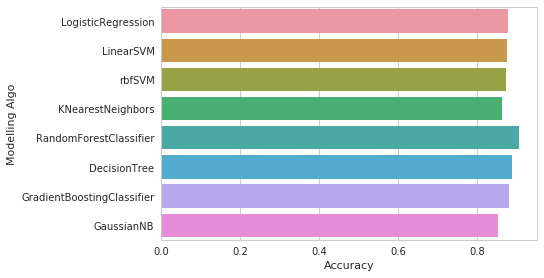

In [81]:
# just to visualize the accuracies.
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

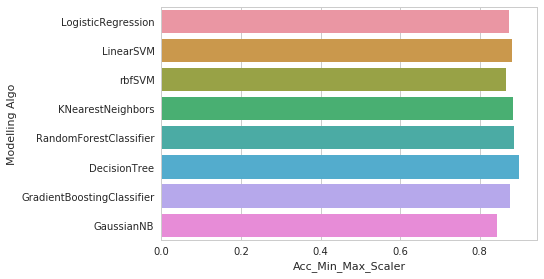

In [82]:
sns.barplot(y='Modelling Algo',x='Acc_Min_Max_Scaler',data=acc_frame)

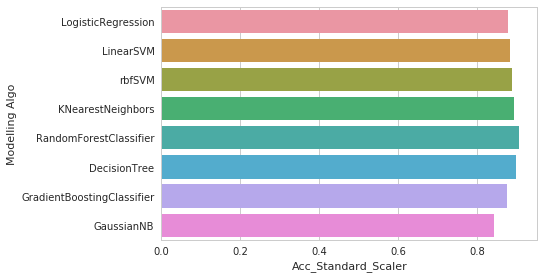

In [83]:
sns.barplot(y='Modelling Algo',x='Acc_Standard_Scaler',data=acc_frame)

In [84]:
# preparing the features by using a StandardScaler as it gave better resluts.
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

X=scaled_df[:,0:11]
Y=df['quality'].as_matrix()

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
# 1. LOGISTIC REGRESSION.
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

In [ ]:
print(clf_lr.best_params_)
print(clf_lr.best_score_) # the best accuracy obtained by Grid search on the train set.

pred=clf_lr.predict(x_test)
score = accuracy_score(pred,y_test)
print(score)

In [ ]:
# 2. KNN.
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)

In [ ]:
print(clf_knn.best_score_)
print(clf_knn.best_params_)

pred=clf_knn.predict(x_test)
score = accuracy_score(pred,y_test)   # actual accuarcy on our test set.
print(score)

In [ ]:
# 3. SUPPORT VECTOR MACHINE (SVM)
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)

In [ ]:
print(clf.best_score_)
print(clf.best_params_)

In [ ]:
# now tuning finally around these values of C and gamma and the kernel for further increasing the accuracy.
params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(x_train,y_train)

In [ ]:
print(clf_svm.best_score_)
print(clf_svm.best_params_)

pred=clf_svm.predict(x_test)
score = accuracy_score(pred,y_test)   # actual accuarcy on our test set.
print(score)

In [ ]:
# 4. RANDOM FOREST.
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

In [ ]:
print(clf_rf.best_score_)
print(clf_rf.best_params_)

pred=clf_rf.predict(x_test)
score = accuracy_score(pred,y_test)   # actual accuarcy on our test set.
print(score)

In [ ]:
# 5. GRADIENT BOOSTING.
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

In [ ]:
print(clf_gb.best_score_)
print(clf_gb.best_params_)

pred=clf_gb.predict(x_test)
score = accuracy_score(pred,y_test)
print(score)

# HENCE ON GIVEN PARAMETER TUNING THE SVM WITH rbf KERNEL GIVES THE HIGHEST ACCURACY OF 91.75%

In [85]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
data = pd.read_csv("wine/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


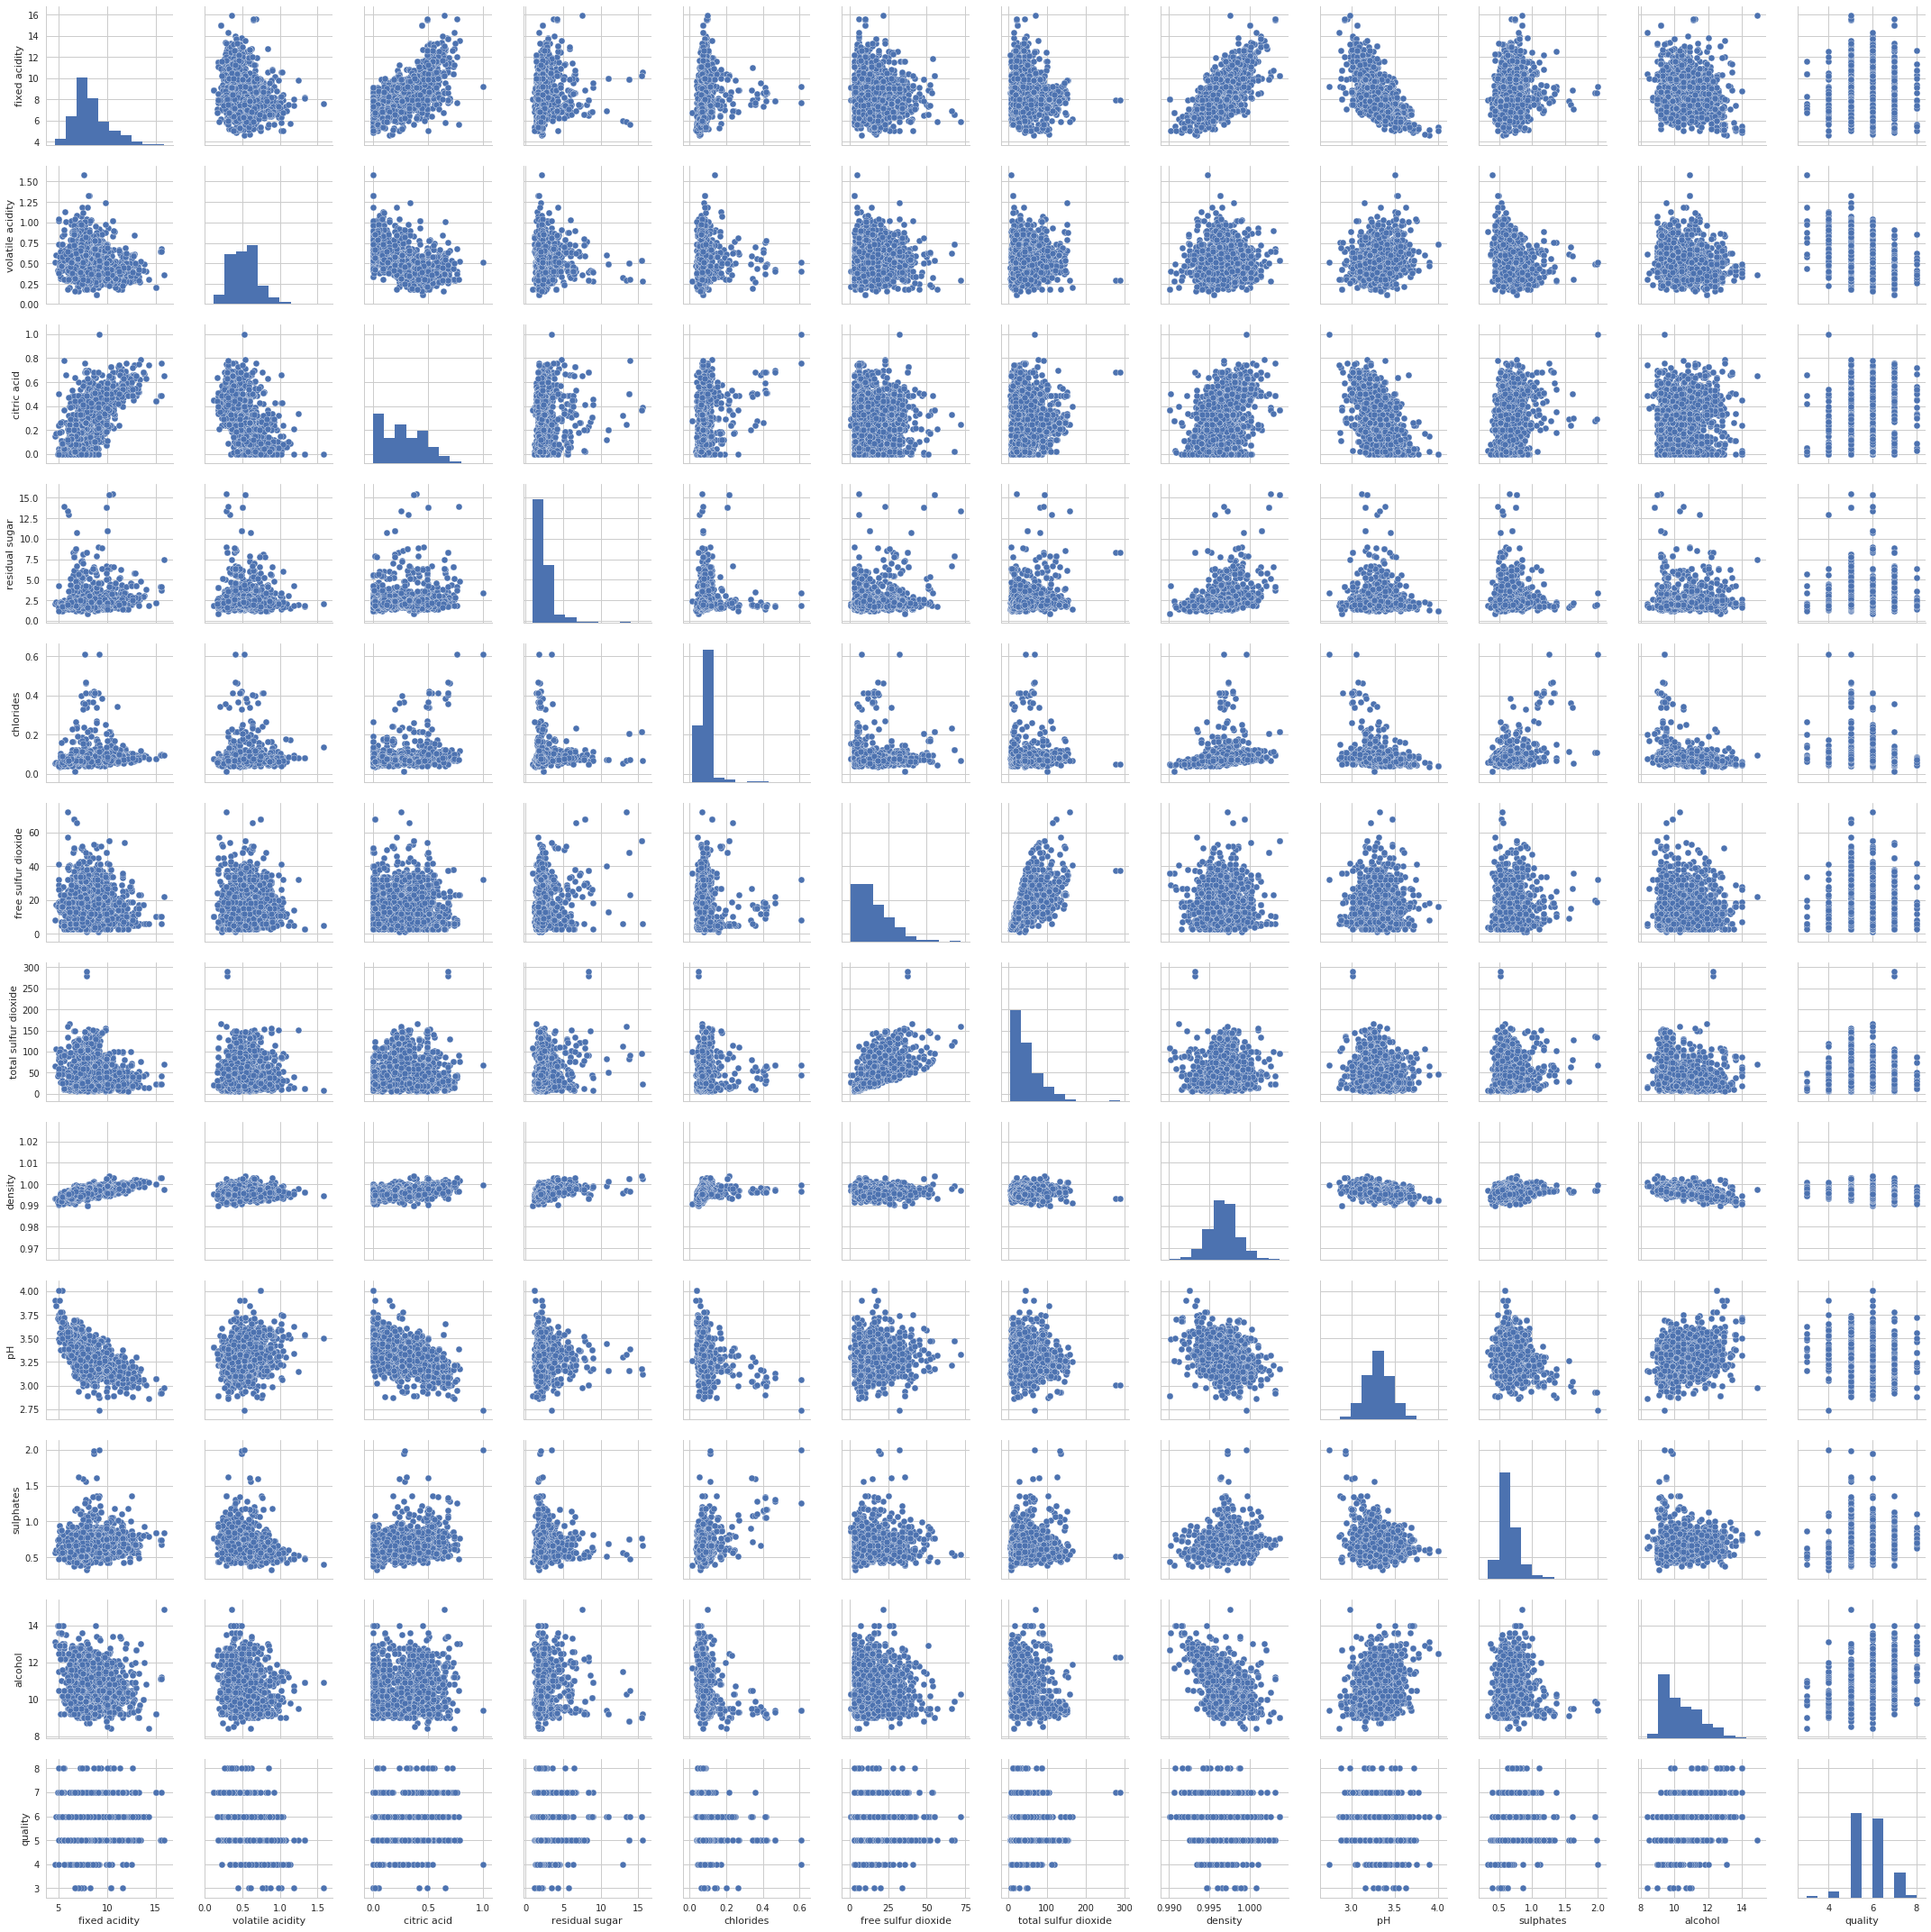

In [88]:
#Check correleation between the variables using Seaborn's pairplot. 
sns.pairplot(data)

In [89]:
#count of each target variable
from collections import Counter
Counter(data['quality'])

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

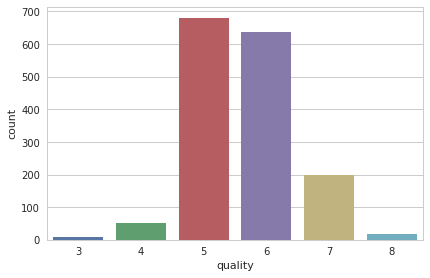

In [90]:
#count of the target variable
sns.countplot(x='quality', data=data)

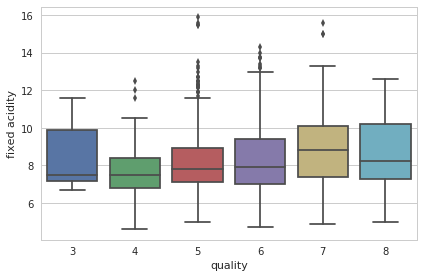

In [91]:
#Plot a boxplot to check for Outliers
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'fixed acidity', data = data)

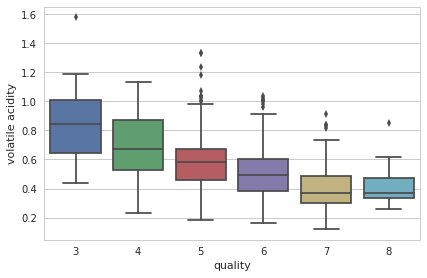

In [92]:
sns.boxplot('quality', 'volatile acidity', data = data)

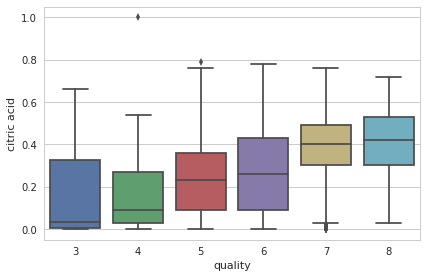

In [93]:
sns.boxplot('quality', 'citric acid', data = data)

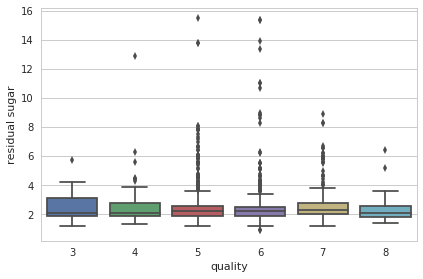

In [94]:
sns.boxplot('quality', 'residual sugar', data = data)

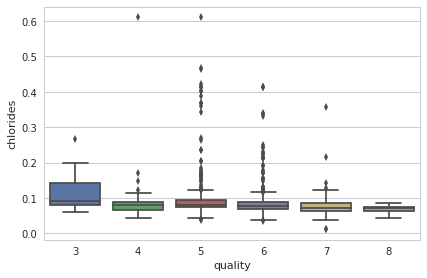

In [95]:
sns.boxplot('quality', 'chlorides', data = data)

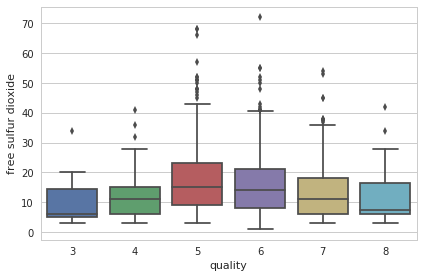

In [96]:
sns.boxplot('quality', 'free sulfur dioxide', data = data)

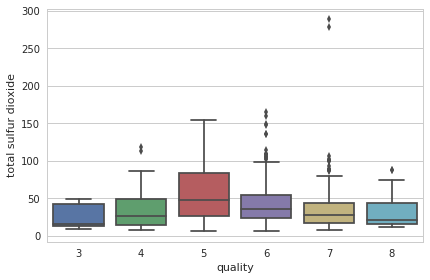

In [97]:
sns.boxplot('quality', 'total sulfur dioxide', data = data)

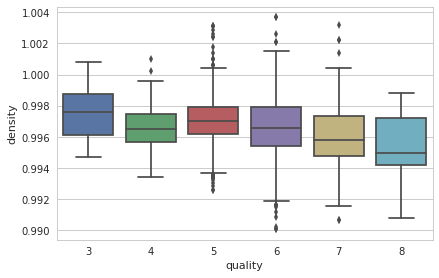

In [98]:
sns.boxplot('quality', 'density', data = data)

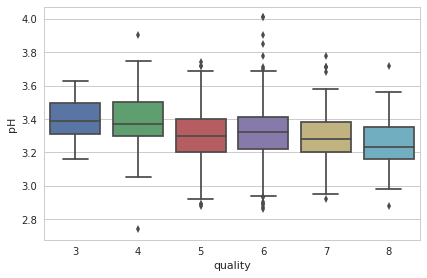

In [99]:
sns.boxplot('quality', 'pH', data = data)

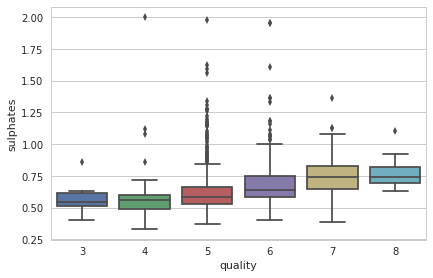

In [100]:
sns.boxplot('quality', 'sulphates', data = data)

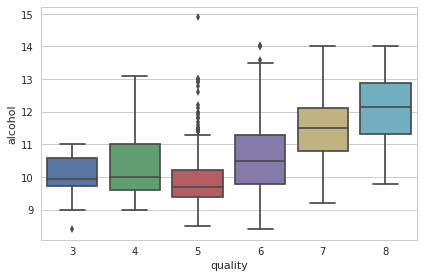

In [101]:
sns.boxplot('quality', 'alcohol', data = data)

In [102]:
#boxplots show many outliers for quite a few columns. Describe the dataset to get a better idea on what's happening
data.describe()
#fixed acidity - 25% - 7.1 and 50% - 7.9. Not much of a variance. Could explain the huge number of outliers
#volatile acididty - similar reasoning
#citric acid - seems to be somewhat uniformly distributed
#residual sugar - min - 0.9, max - 15!! Waaaaay too much difference. Could explain the outliers.
#chlorides - same as residual sugar. Min - 0.012, max - 0.611
#free sulfur dioxide, total suflur dioxide - same explanation as above

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [103]:
#next we shall create a new column called Review. This column will contain the values of 1,2, and 3. 
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews
reviews = []
for i in data['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
data['Reviews'] = reviews

In [104]:
Counter(data['Reviews'])

Counter({'2': 1571, '3': 18, '1': 10})

In [105]:
x = data.iloc[:,:11]
y = data['Reviews']

In [106]:
x.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [107]:
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: Reviews, dtype: object

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

#view the scaled features
print(x)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [109]:
# Proceed to perform PCA

from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

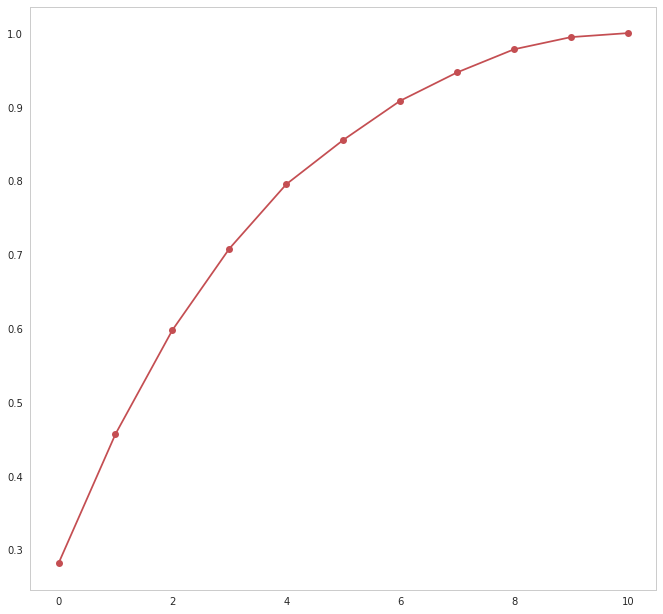

In [110]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [112]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)

print(x_new)

[[-1.61952988  0.45095009 -1.77445415 ... -0.91392069 -0.16104319
  -0.28225828]
 [-0.79916993  1.85655306 -0.91169017 ...  0.92971392 -1.00982858
   0.76258697]
 [-0.74847909  0.88203886 -1.17139423 ...  0.40147313 -0.53955348
   0.59794606]
 ...
 [-1.45612897  0.31174559  1.12423941 ... -0.50640956 -0.23108221
   0.07938219]
 [-2.27051793  0.97979111  0.62796456 ... -0.86040762 -0.32148695
  -0.46887589]
 [-0.42697475 -0.53669021  1.6289552  ... -0.49615364  1.18913227
   0.04217568]]


In [113]:
# Split the data into train and test data

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 8)
(1199,)
(400, 8)
(400,)


In [114]:
# 1) Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[  0   3   0]
 [  0 392   0]
 [  0   5   0]]
98.0


In [115]:
# 2) Decision Trees
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)

#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[  1   2   0]
 [  4 386   2]
 [  0   5   0]]
96.75


In [116]:
# 3) Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)

#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[  1   2   0]
 [  4 387   1]
 [  0   5   0]]
97.0


In [117]:
# 4) Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[  0   3   0]
 [  1 391   0]
 [  0   5   0]]
97.75


In [118]:
# 5.1) SVM (rbf kernel)
from sklearn.svm import SVC

#we shall use the rbf kernel first and check the accuracy
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc=rf.predict(x_test)

#print confusion matrix and accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

[[  0   3   0]
 [  1 391   0]
 [  0   5   0]]
97.75


In [119]:
# 5.2) SVM (linear kernel)

rbf_svc = SVC(kernel='linear')
rbf_svc.fit(x_train, y_train)
rbf_svc=rf.predict(x_test)

rbf_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
rbf_svc_acc_score = accuracy_score(y_test, rf_predict)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score*100)

[[  0   3   0]
 [  1 391   0]
 [  0   5   0]]
97.75


In [120]:
# So we can see that the SVC and the Random Forest give us good prediction accuracy for the Wine Classification problem.
# We can further improve accuracy by fine-tuning the parameters of each classifier.